In [2]:
# import libraries:

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# functions:


In [5]:
# read in the main datafile:

df = catalog.load('modeling_input')

[10/09/22 10:27:23] INFO     Loading data from 'modeling_input' (CSVDataSet)...                 ]8;id=425491;file:///opt/anaconda3/envs/stock-classification/lib/python3.7/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=647531;file:///opt/anaconda3/envs/stock-classification/lib/python3.7/site-packages/kedro/io/data_catalog.py#344\344]8;;\

Questions to answer:
* for each stock, how predictive are moving averages relative to the target? (x% of the time when the moving average )
* does a squeeze of the bollinger bands indicate a positive change in the price 20 days out? -> i.e., diff in bottom and top bollinger band or difference from the top
* at each % level above the moving average, how indicative is that of 20 day stock performance?
* For cumulative days above a given moving average, how often does the price increase 2 days from that point?


For each view:
* Create overall summary of the distribution 




In [ ]:

# clean the data:
df = 


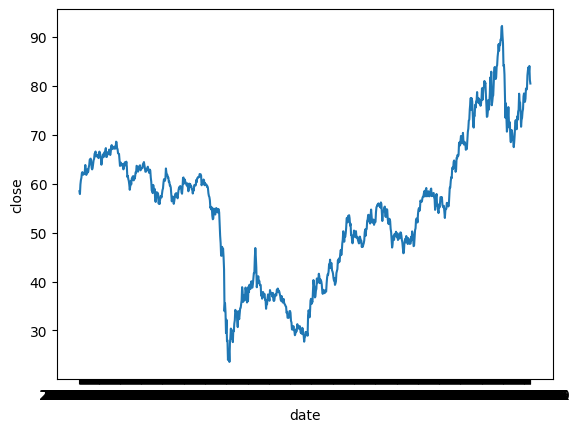

In [10]:
sns.lineplot(data=df[df['ticker'] == 'XLE'], x="date", y="close")

In [17]:
# for each view: -> Continuous = scatterplot; discrete = boxplot; Indicator can also be barplot summary

# bargraph:
indicator_fields = ['above_7_close_sma_ind', 'above_14_close_sma_ind', 'above_21_close_sma_ind']
target_field = 'target_20_days_ahead_ind'

test = df[df['ticker'] == 'XLE']

for field in indicator_fields:

    # summarize:
    print(test.groupby(by = [field, target_field])['high'].count().reset_index())

    




   above_7_close_sma_ind  target_20_days_ahead_ind  high
0                    0.0                         0   205
1                    0.0                         1   227
2                    1.0                         0   209
3                    1.0                         1   277
   above_14_close_sma_ind  target_20_days_ahead_ind  high
0                     0.0                         0   197
1                     0.0                         1   214
2                     1.0                         0   217
3                     1.0                         1   283
   above_21_close_sma_ind  target_20_days_ahead_ind  high
0                     0.0                         0   195
1                     0.0                         1   217
2                     1.0                         0   219
3                     1.0                         1   273


In [11]:
# Look at gap to the moving averages:

df.columns

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'adj_close', 'ticker',
       '7_close_sma', '14_close_sma', '21_close_sma', '7_close_std',
       '14_close_std', '21_close_std', 'above_7_close_sma_ind',
       '7_close_sma_pct_diff', 'above_14_close_sma_ind',
       '14_close_sma_pct_diff', 'above_21_close_sma_ind',
       '21_close_sma_pct_diff', 'cum_days_above_above_7_close_sma_ind',
       'cum_days_above_above_14_close_sma_ind',
       'cum_days_above_above_21_close_sma_ind', 'upper_bollinger_band',
       'lower_bollinger_band', 'bol_pct_from_top', 'bol_pct_from_bottom',
       'bol_range', 'bol_range_pct', 'target_20_days_ahead',
       'target_20_days_ahead_ind'],
      dtype='object')

In [18]:
df.head()

,date,high,low,open,close,volume,adj_close,ticker,7_close_sma,14_close_sma,...,cum_days_above_above_14_close_sma_ind,cum_days_above_above_21_close_sma_ind,upper_bollinger_band,lower_bollinger_band,bol_pct_from_top,bol_pct_from_bottom,bol_range,bol_range_pct,target_20_days_ahead,target_20_days_ahead_ind
0,2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.168354,AAPL,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41.610001,1
1,2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.366493,AAPL,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41.630001,1
2,2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.833588,AAPL,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.812500,1
3,2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.753819,AAPL,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,43.544998,1
4,2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.435398,AAPL,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,43.560001,1
